In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

# Pack the latitudes and longitudes together.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.56665426971986 120.10745909616418
-88.1700257955355 -119.65075245996178
-80.59729838058544 -172.76585082274195
-14.399428445602666 -66.63397525696246
-59.915641028969176 95.26575962064288
-27.59024384422502 1.3237602928037973
-42.801260421317735 34.017771825575636
77.42072454516301 126.7747942044129
-47.65175956518477 105.21454895627033
-40.382506207715245 -130.304760922419
32.44490044020624 -142.09752867897254
47.8737321138899 -154.2735023722599
13.458580970601787 -123.03335825486923
26.398144976805 14.105701413952318
82.95224190153343 -131.12968579117347
84.57722371875232 50.08107670950639
-24.08017753627378 16.44998874082657
37.12273806970856 -19.213559856890043
86.90513347131588 175.78945803461272
-25.83346781973019 -111.26650599277264
-21.711188650279098 114.40056805249333
67.56243738430865 83.45795106204747
-43.760778855827844 -15.079128698398335
69.53073680868525 -80.08266790105088
-68.25036729406969 -33.52808677965501
-21.724222076912525 -143.68967791064355
-24.9991389630213

79.51174247903535 -151.15433694640168
-33.858835701044434 79.53286198963985
50.02916119354106 -69.47424181657075
65.93178810026515 -31.038915354678466
-74.76006392187517 -5.160530031953613
-28.971782900139303 54.50084317033219
15.476193991183706 -67.51768310093041
74.95717158474062 153.69160076152917
-19.564982497852725 86.02207947047282
-42.374635916090746 -69.38760610832526
-24.486877695823097 64.01679306657428
-61.255668916426764 -88.83932912887994
-19.15555214960507 -28.574764088987223
7.187346504914629 -169.8127572922121
84.18992226448967 34.24294289602756
-52.010303614570724 61.90573501429793
-44.82630029797596 45.728892911413254
-9.456912460702853 144.2391405985311
24.443572901046124 -152.4646701938261
-7.754102158542224 -83.77662290552624
-63.37019951189964 -86.51259050999872
-72.19117211185689 172.30156949301062
-33.01832618348822 22.785182307929546
-9.209240030353513 51.18994504410463
3.6741840871294045 -26.015126946191174
-67.47956372481231 137.51845354546464
33.676846521449

-55.176880295934545 -109.7543241242123
26.74130839946575 -94.68736818025214
-23.182130755098555 -168.8506989024073
-54.62783482422191 44.29040505155328
47.969216864602714 -68.88846975200875
-47.698912544950396 85.69510157800863
38.782466320000594 -165.33939829690962
49.50907040191825 -133.62235318061883
-46.9512202053346 -172.03886324051587
-47.39557102227323 66.18504196763521
-35.03743381851151 -18.066605850377755
25.25400158636664 -111.00340905259986
44.40473467074281 -175.04801542241728
-46.802144722245146 103.26769767438236
-9.647104396871981 -15.726167195307823
61.00135792806134 103.09492436973295
-59.87189911931488 -162.78591574761407
-81.7583175291242 133.4913219986522
62.24776479672536 80.26109500728609
48.26850496043528 2.065626475270193
-38.9608479124911 -122.49662450472931
-8.98007010365022 -138.56196053972215
85.4365371829588 94.41972936611677
-33.13663973649186 -8.645018217083049
-6.794740753190126 -11.441163378354616
48.57893517072026 -148.6791950392758
9.17301262749649 4

In [5]:
# Import the citipy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import requests.
import requests

# Import the API key.
from config import weather_api_key

# Set up the starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increment the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Tally up the city count.
print(f"{len(city_data)} cities have been recorded.")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | santa rosa
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | marzuq
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | maltahohe
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | 

Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | gilleleje
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | utiroa
City not found. Skipping...
Processing Record 46 of Set 4 | santa fe
Processing Record 47 of Set 4 | necochea
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | machachi
Processing Record 50 of Set 4 | sabha
Processing Record 1 of Set 5 | mingshui
Processing Record 2 of Set 5 | tucuman
Processing Record 3 of Set 5 | arlit
Processing Record 4 of Set 5 | pavilosta
Processing Record 5 of Set 5 | chikoy
City not found. Skipping...
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | yerbogachen
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | luba
Processing Record 10 of Set 5 | avera
Processing Record 11 of Set 5 | qaqortoq
Processing Record 12 of Set 5 | westport
Processing Record 13 of Set 5 | charlestown
Processing Record 14 of Set 5 | hami
Processing Record 15 of

City not found. Skipping...
Processing Record 29 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 30 of Set 8 | iberia
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | verkhnevilyuysk
Processing Record 33 of Set 8 | san lazaro
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | half moon bay
Processing Record 37 of Set 8 | dunedin
Processing Record 38 of Set 8 | oranjestad
Processing Record 39 of Set 8 | berezovyy
Processing Record 40 of Set 8 | henderson
Processing Record 41 of Set 8 | catia la mar
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | grand centre
City not found. Skipping...
Processing Record 44 of Set 8 | kincardine
Processing Record 45 of Set 8 | hun
Processing Record 46 of Set 8 | narrabri
Processing Record 47 of Set 8 | road town
Processing Record 48 of Set 8 | havelock
Processing Record 49 of Set 8 | ancud
Processing Reco

City not found. Skipping...
Processing Record 15 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 12 | tabialan
City not found. Skipping...
Processing Record 17 of Set 12 | talaja
Processing Record 18 of Set 12 | sistranda
Processing Record 19 of Set 12 | belmopan
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | buala
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | sao jose da coroa grande
Processing Record 25 of Set 12 | pochutla
Processing Record 26 of Set 12 | kayanga
Processing Record 27 of Set 12 | miandrivazo
Processing Record 28 of Set 12 | palu
Processing Record 29 of Set 12 | ca mau
Processing Record 30 of Set 12 | raikot
Processing Record 31 of Set 12 | miramar
Processing Record 32 of Set 12 | saint-augustin
Processing Record 33 of Set 12 | podujevo
Processing Record 34 of Set 12 | mosquera
Processing Record 35 of Set 12 | toftir
City not found. Skipping

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,22.80,96,100,7.87,RU,2022-10-13 02:41:16
1,Punta Arenas,-53.1500,-70.9167,35.71,69,40,23.02,CL,2022-10-13 02:40:32
2,Vaini,-21.2000,-175.2000,78.96,83,20,12.66,TO,2022-10-13 02:41:17
3,Santa Rosa,14.3122,121.1114,89.58,68,84,4.36,PH,2022-10-13 02:41:17
4,Busselton,-33.6500,115.3333,56.82,59,75,4.61,AU,2022-10-13 02:41:18
5,Jamestown,42.0970,-79.2353,63.99,54,100,10.36,US,2022-10-13 02:40:53
6,East London,-33.0153,27.9116,68.41,89,100,15.28,ZA,2022-10-13 02:41:19
7,Tiksi,71.6872,128.8694,22.62,86,100,7.16,RU,2022-10-13 02:39:02
8,Rikitea,-23.1203,-134.9692,69.21,62,0,15.30,PF,2022-10-13 02:41:20
9,Hilo,19.7297,-155.0900,86.29,80,40,11.50,US,2022-10-13 02:40:50


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data", "cities.csv")

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

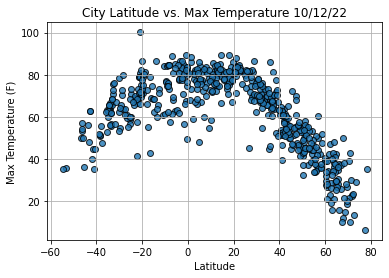

In [14]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
output1 = os.path.join("weather_data", "Fig1.png")
plt.savefig(output1)

# Show the plot.
plt.show()

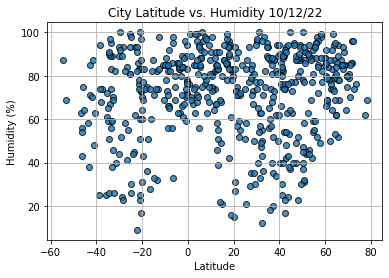

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
output2 = os.path.join("weather_data", "Fig2.png")
plt.savefig(output2)

# Show the plot.
plt.show()

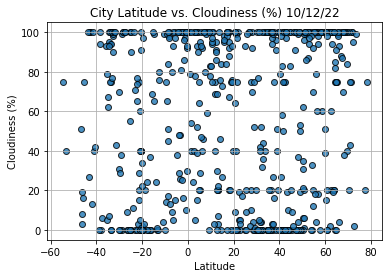

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure.
output3 = os.path.join("weather_data", "Fig3.png")
plt.savefig(output3)

# Show the plot.
plt.show()

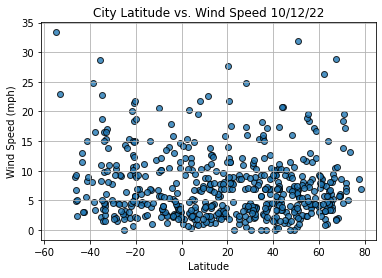

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure.
output4 = os.path.join("weather_data", "Fig4.png")
plt.savefig(output4)

# Show the plot.
plt.show()

In [18]:
# Import the linear regression model.
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and to plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = (x_values * slope) + intercept
    
    # Get the equation of the line.
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "red")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create the Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

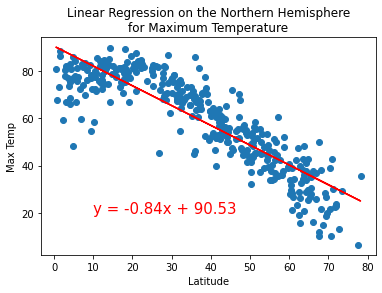

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\nfor Maximum Temperature",
                       "Max Temp", (10, 20))

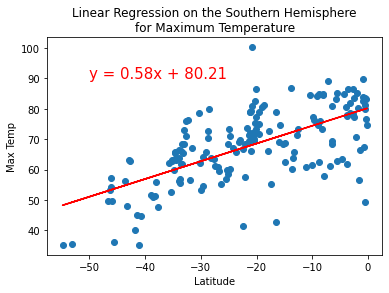

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\nfor Maximum Temperature",
                       "Max Temp", (-50, 90))

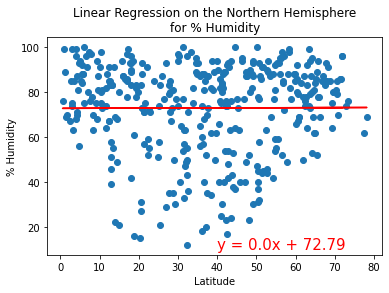

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\nfor % Humidity",
                       "% Humidity", (40, 10))

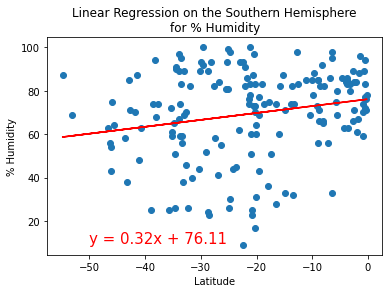

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\nfor % Humidity",
                       "% Humidity", (-50, 10))

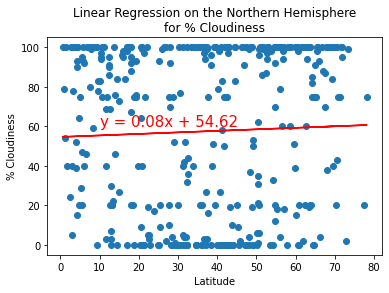

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\nfor % Cloudiness",
                       "% Cloudiness", (10, 60))

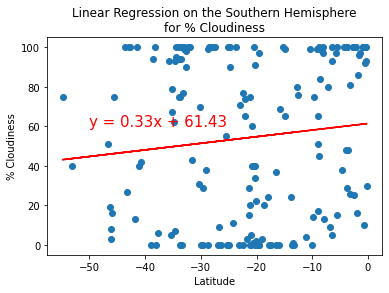

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\nfor % Cloudiness",
                       "% Cloudiness", (-50, 60))

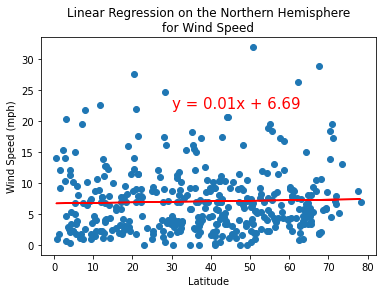

In [32]:
## Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\nfor Wind Speed",
                       "Wind Speed (mph)", (30, 22))

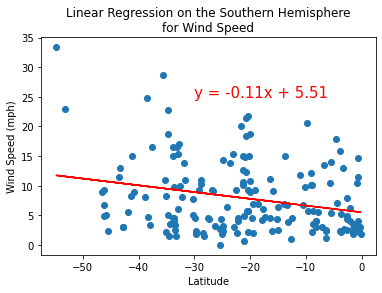

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\nfor Wind Speed",
                       "Wind Speed (mph)", (-30, 25))